In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [130]:
((XT,YT),(Xt,Yt))=imdb.load_data(num_words=10000)

In [131]:
words=imdb.get_word_index()

In [132]:
##in words key is mapped to value and to get the sentence we must reverse key and value
imdb_words=dict([value,key] for [key,value] in words.items())

In [133]:
actual_review=' '.join(imdb_words.get(idx-3,'?')for idx in Xt[1])

In [134]:
import numpy as np

In [135]:
from sklearn.feature_extraction.text import CountVectorizer

In [141]:
cv=CountVectorizer()

In [151]:
def Vectorizer(X,columns=10000):
    length=len(X)
    outputs = np.zeros((len(X),columns))
    for i,idx in enumerate(X):
        outputs[i,idx]=1
    return outputs

In [152]:
Xtrain=Vectorizer(XT)
Xtest=Vectorizer(Xt)

MemoryError: 

In [153]:
Ytrain=np.asarray(YT).astype('float32')

In [154]:
Ytest=np.asarray(Yt).astype('float32')

In [155]:
from keras.layers import Dense

In [156]:
from keras import models


In [157]:
model=models.Sequential()


In [158]:
model.add(Dense(16,activation='relu',input_shape=(10000,)))

In [159]:
model.add(Dense(16,activation='relu'))

In [160]:
model.add(Dense(1,activation='sigmoid'))

In [161]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [162]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_12 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [163]:
x_val = Xtrain[:5000]
x_train_new = Xtrain[5000:]

y_val = Ytrain[:5000]
y_train_new = Ytrain[5000:]

In [164]:
hist = model.fit(x_train_new,y_train_new,epochs=4,batch_size=512,validation_data=(x_val,y_val))

Train on 20000 samples, validate on 5000 samples
Epoch 1/4
20000/20000 [==============================] - 25s 1ms/step - loss: 0.4726 - acc: 0.8065 - val_loss: 0.3665 - val_acc: 0.8582
Epoch 2/4
20000/20000 [==============================] - 12s 605us/step - loss: 0.2717 - acc: 0.9059 - val_loss: 0.2940 - val_acc: 0.8864
Epoch 3/4
20000/20000 [==============================] - 9s 458us/step - loss: 0.2025 - acc: 0.9307 - val_loss: 0.2696 - val_acc: 0.8914
Epoch 4/4
20000/20000 [==============================] - 8s 376us/step - loss: 0.1668 - acc: 0.9415 - val_loss: 0.2804 - val_acc: 0.8906


In [165]:
import matplotlib.pyplot as plt

In [166]:
h=hist.history

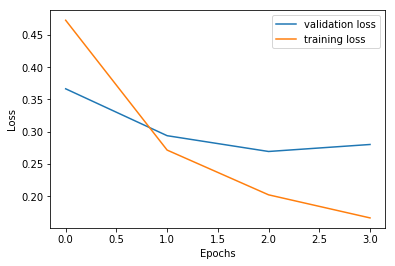

In [168]:
plt.plot(h['val_loss'],label="validation loss")
plt.plot(h['loss'],label="training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

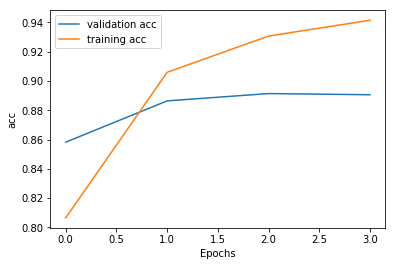

In [169]:
plt.plot(h['val_acc'],label="validation acc")
plt.plot(h['acc'],label="training acc")
plt.xlabel("Epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [174]:
model.evaluate(Xtrain,Ytrain)[1]

25000/25000 [==============================] - 15s 590us/step


0.94568

In [175]:
model.evaluate(Xtest,Ytest)[1]

25000/25000 [==============================] - 64s 3ms/step


0.87932

In [178]:
predictions=model.predict(Xtest)